## Linear Regression with threshold optimization
Need to add crossvalidation

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
# get a list of all columns
columns = df.columns.tolist()

In [6]:
# remove target feature Response from the list
columns.remove("Response")

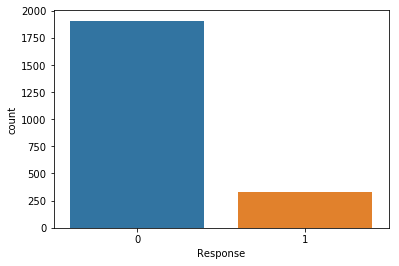

In [7]:
# very imbalanced dataset
countplot(x="Response", data=df)

In [8]:
seed = 0 

In [9]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(df, test_size=0.2, random_state=seed)

In [17]:
X_train.head()

818     0
1281    1
1766    0
1577    0
924     0
Name: Response, dtype: int64

In [11]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()

In [12]:
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)


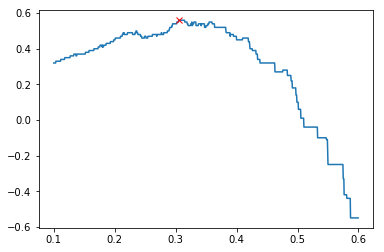

In [13]:
threshold = utils.max_threshold(y_predicted, y_test, threshold_range = (0.1, 0.6),iterations=1000, visualization=True)

In [14]:
y_pred = utils.predict_with_threshold(y_predicted,threshold)
print("Profit:", utils.profit_share(y_pred, y_test))

Profit: 0.56
